In [219]:
ecg_df=pd.read_csv("C:\\Users\\USER\\Desktop\\shi\\MIT-BIH Arrhythmia Database.csv")

In [220]:
ecg_df.rename(columns={'N': 'Normal', 'VEB': 'Premature ventricular contraction','SVEB':'Supraventricular premature beat','F':'Fusion of ventricular and normal beat'}, inplace=True)

In [221]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras  import utils
from keras.utils import to_categorical
from sklearn.utils import class_weight, resample
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

In [222]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [223]:
import seaborn as sns

In [224]:
from sklearn.preprocessing import RobustScaler

In [225]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# Define or load your DataFrame 'ecg_df'

# Check the data types of the columns
print(ecg_df.info())

# Select numerical columns
numerical_columns = ecg_df.select_dtypes(include=np.number).columns

# Ensure there are no missing values
ecg_df.dropna(subset=numerical_columns, inplace=True)

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the selected columns
ecg_df[numerical_columns] = robust_scaler.fit_transform(ecg_df[numerical_columns])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

In [226]:
for index, row in ecg_df.iterrows():
    for col in ecg_df.columns:
        if pd.isnull(row[col]):
            print(f"Missing value in row {index}, column {col}")


In [188]:
ecg_df=ecg_df.dropna()

In [227]:
mask = ecg_df['type'] =='Q'
ecg_df=ecg_df[~mask]

In [228]:
ecg_df['type'].value_counts()

type
N       90083
VEB      7009
SVEB     2779
F         803
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

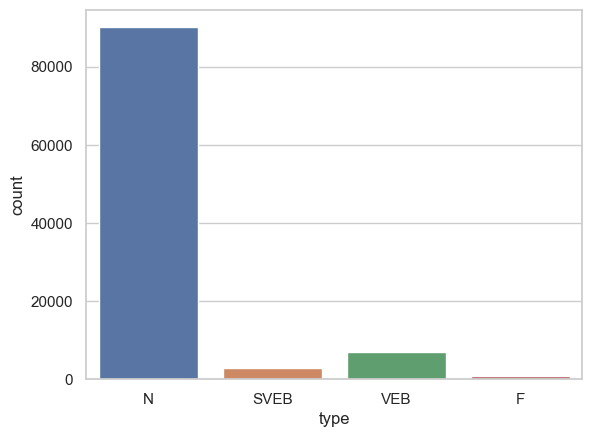

In [229]:
sns.countplot(x='type', data = ecg_df)

In [230]:
import pandas as pd

# Assuming you have a DataFrame named ecg_df

# Filter rows with 'N' in the 'type' column
n_rows = ecg_df[ecg_df['type'] == 'N']

# Calculate the number of rows to keep (10% of the 'N' rows)
rows_to_keep = int(len(n_rows) * 0.10)

# Sample 10% of the 'N' rows randomly
n_rows = n_rows.sample(n=rows_to_keep, random_state=42)

# Filter out the rest of the rows
ecg_df = ecg_df[ecg_df['type'] != 'N']

# Combine the 10% of 'N' rows with the rest of the DataFrame
ecg_df = pd.concat([ecg_df, n_rows])


In [231]:
ecg_df['type'].value_counts()

type
N       9008
VEB     7009
SVEB    2779
F        803
Name: count, dtype: int64

In [232]:
print(ecg_df.columns)


Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')


In [233]:
from sklearn.feature_selection import SelectKBest, f_classif

In [234]:
X = ecg_df.drop('type', axis=1)
y = ecg_df['type']
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
y=lb.fit_transform(y)
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
if len(selected_indices) > 0:
    selected_features = X.columns[selected_indices]
    print(selected_features)
else:
    print("No features selected")

Index(['0_pre-RR', '0_sPeak', '1_pre-RR', '1_qPeak', '1_qrs_morph0'], dtype='object')


In [235]:
selected=['0_pre-RR', '0_pPeak', '0_qPeak', '0_qrs_morph0', '1_pre-RR']
ecg_df=ecg_df.loc[:, selected]

In [236]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Before SMOTE:")
print(pd.Series(y).value_counts())
print("After SMOTE:")
print(pd.Series(y_resampled).value_counts())

Before SMOTE:
1    9008
3    7009
2    2779
0     803
Name: count, dtype: int64
After SMOTE:
2    9008
3    9008
0    9008
1    9008
Name: count, dtype: int64


In [237]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [238]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [244]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU

In [249]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))

model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
model.add(Dropout(0.5))

# Add more convolutional and dropout layers
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
model.add(Dropout(0.5))

# Add a GRU layer on top of the previous layers
gru_units = 128  # Number of GRU units
model.add(GRU(gru_units))

# Add more dense layers with dropout
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))

# Flatten layer after GRU
model.add(Flatten())

model.add(Dense(units=4, activation='softmax'))


In [250]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [251]:
from keras.callbacks import EarlyStopping

In [257]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
631/631 [==============================] - 24s 35ms/step - loss: 0.0911 - accuracy: 0.9713 - val_loss: 0.0854 - val_accuracy: 0.9758
Epoch 2/30
631/631 [==============================] - 22s 35ms/step - loss: 0.0892 - accuracy: 0.9716 - val_loss: 0.1003 - val_accuracy: 0.9728
Epoch 3/30
631/631 [==============================] - 23s 37ms/step - loss: 0.0858 - accuracy: 0.9727 - val_loss: 0.1214 - val_accuracy: 0.9730
Epoch 4/30
631/631 [==============================] - 23s 37ms/step - loss: 0.0804 - accuracy: 0.9736 - val_loss: 0.0987 - val_accuracy: 0.9758
Epoch 5/30
631/631 [==============================] - 23s 37ms/step - loss: 0.0848 - accuracy: 0.9744 - val_loss: 0.1011 - val_accuracy: 0.9774
Epoch 6/30
631/631 [==============================] - 23s 37ms/step - loss: 0.0805 - accuracy: 0.9741 - val_loss: 0.0787 - val_accuracy: 0.9802
Epoch 7/30
631/631 [==============================] - 24s 37ms/step - loss: 0.0860 - accuracy: 0.9741 - val_loss: 0.0838 - val_accuracy:

In [258]:
model.save('ecg_classifier.h5')

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [259]:
from tensorflow import keras
model = keras.models.load_model('ecg_classifier.h5')

In [260]:
results = model.evaluate(x_test, y_test)
print("Test Loss:", results[0])
print("Test Metrics:", results[1:])

338/338 [==============================] - 3s 9ms/step - loss: 0.0887 - accuracy: 0.9759
Test Loss: 0.08866231888532639
Test Metrics: [0.9759482145309448]


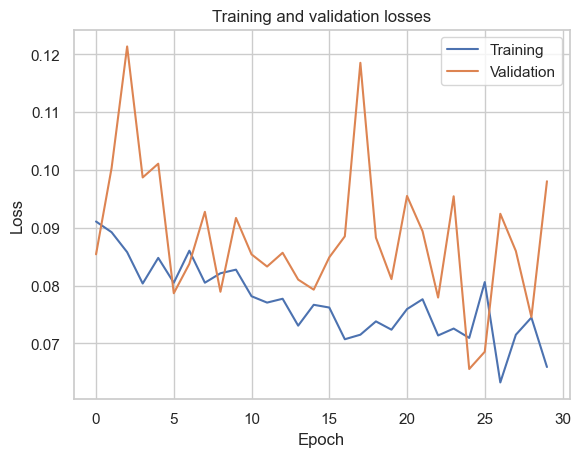

In [266]:
import matplotlib.pyplot as plt

# Assuming you have a 'history' object from model.fit
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  # This line should be 'val_loss'
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


Text(0.5, 0, 'epoch')

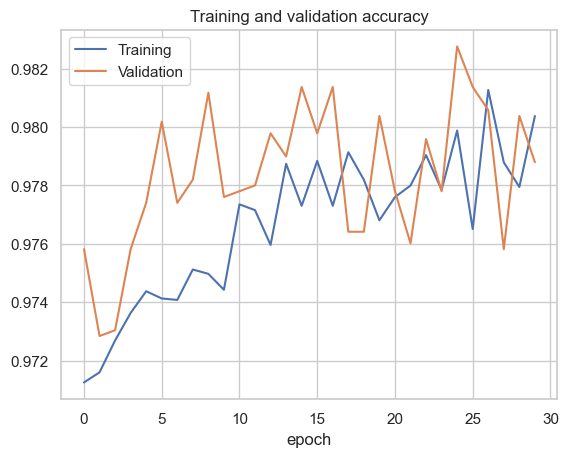

In [263]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')